In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
data = pd.read_csv("insurance.csv")
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
data.shape

(1338, 7)

In [31]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
data['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


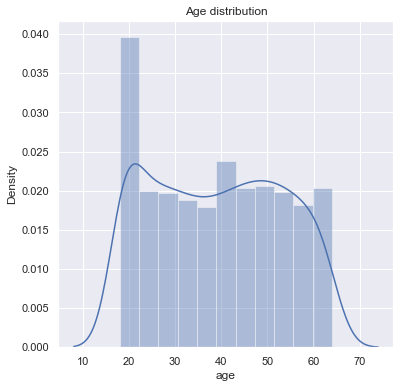

In [33]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title("Age distribution")
plt.show()

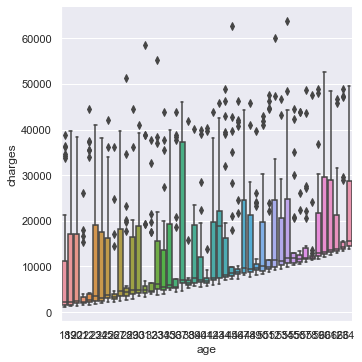

In [34]:
sns.catplot(x="age",y="charges",kind="box",data=data)

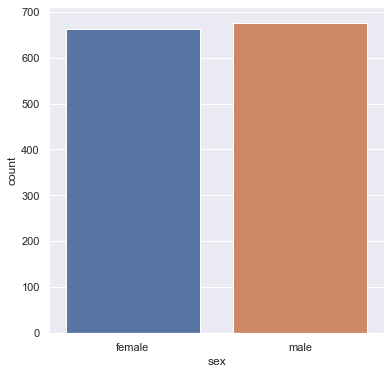

In [35]:
#Gender column
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=data)
plt.show()


In [36]:
#counting the values
data['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


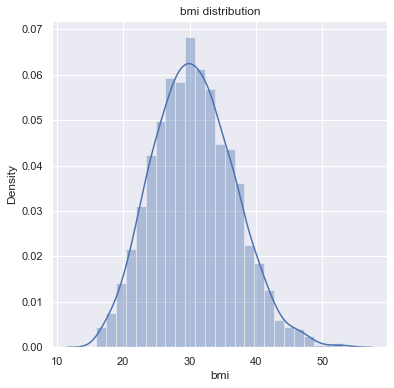

In [37]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title("bmi distribution")
plt.show()

Text(0.5, 1.0, 'children')

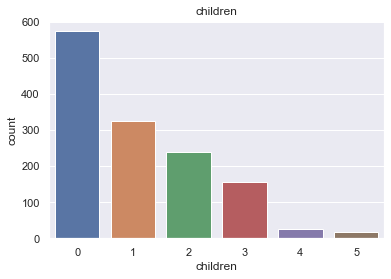

In [38]:
#children column
sns.countplot(x="children",data=data)
plt.title("children")

In [39]:
#Counting he children
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'smoker')

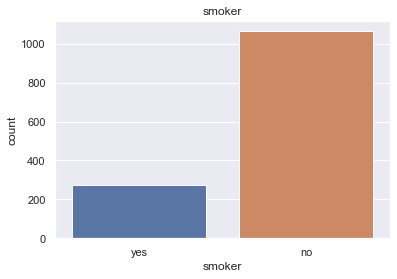

In [40]:
sns.countplot(x="smoker",data=data)
plt.title("smoker")

In [41]:
#To see the exact count of smoker is present in the dataset
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

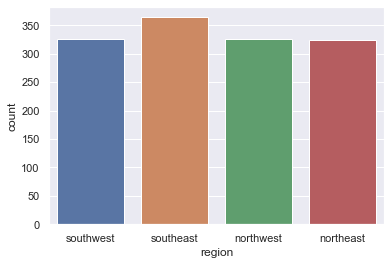

In [42]:
#Region column
sns.countplot(x="region",data=data)

In [43]:
#counting the values
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


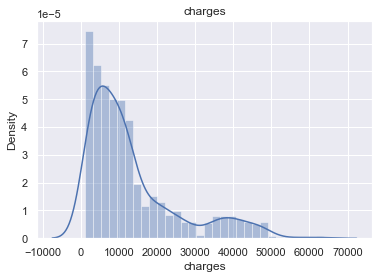

In [44]:
#charges column
sns.distplot(data['charges'])
plt.title("charges")
plt.show()

In [45]:
data['charges'].value_counts()

1639.56310     2
11987.16820    1
7624.63000     1
12523.60480    1
10355.64100    1
              ..
62592.87309    1
18903.49141    1
8538.28845     1
11165.41765    1
60021.39897    1
Name: charges, Length: 1337, dtype: int64

In [46]:
#Data Preprocessing

#Encoding the categorical columns
data.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region column
data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [48]:
#Splitting the data and Target
X=data.drop(columns='charges',axis=1)  ##0 respresents the row and 1 represents the columns
y=data['charges']

In [49]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [50]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [51]:
#Splitting the data into Training and Testing data

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [54]:
#Model Training

In [ ]:
#Loading the linear regression

In [55]:
regressor=LinearRegression()

In [57]:
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Model Evaluation

In [59]:
#Prediction on Training Data
training_data_prediction = regressor.predict(X_train)

In [63]:
#R squared value is lies in the range b/w 0 to 1
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared value',r2_train)

R squared value 0.7519923667088932


In [64]:
#Prediction on Testing Data
testing_data_prediction = regressor.predict(X_test)

In [65]:
#R squared value
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print('R squared value',r2_test)

R squared value 0.7445422986536502


In [66]:
#Building a Predictive System  need to find the insurance of particualr attribute

In [72]:
input_data = (31,1,25.74,0,1,1)

#changing to numpy array
input_data_as_numpy_array = np.asarray(input_data)



#We need to reshape this array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('the insurance in USD', prediction[0])

[3911.4481614]
the insurance in USD 3911.4481614003435
